# EDA on Titanic Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Types of Columns

# Numerical         Categorical         Target
# -----------------------------------------------
# Age               Embarked            Survived
# Fare              Sex
# Survived          Cabin
# Pclass            Ticket
# SibSp 
# Parch

## Bivariate Analysis

### Numerical Vs Numerical
- Survived vs Pclass
- Survived vs Age
- Survived vs Fare
- Age vs Fare

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


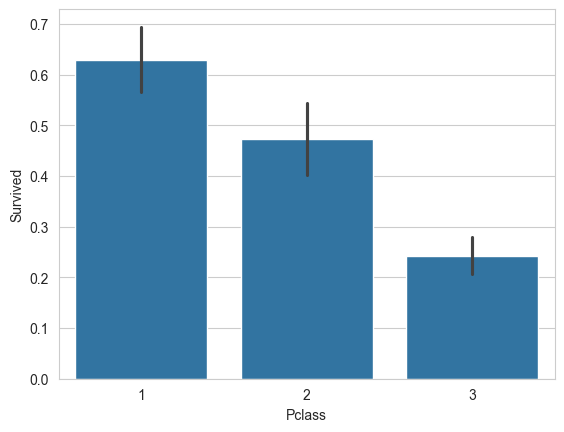

In [28]:
# Survived vs Pclass

display(
  pd.crosstab(df['Pclass'], df['Survived']),
  pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
)

# plot
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


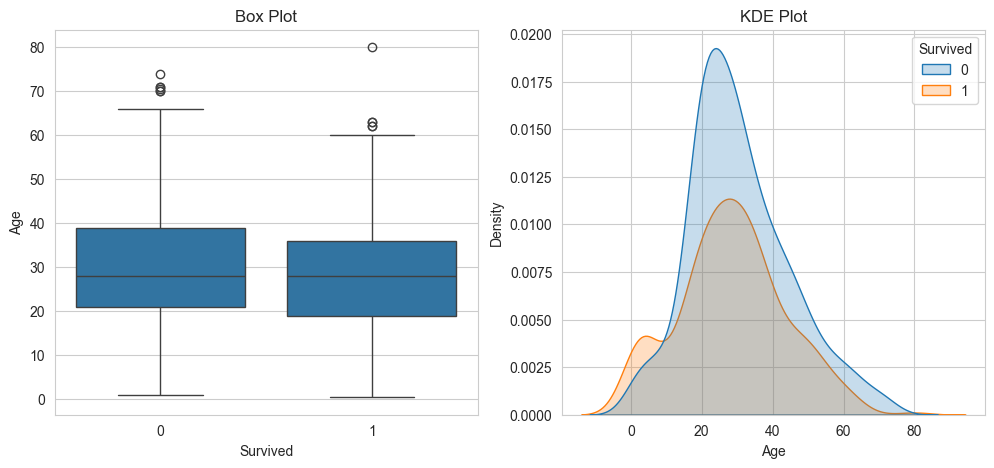

In [ ]:
# Survived vs Age

display(
  df.groupby('Survived')['Age'].describe()
)


# Plot

fig, axes = plt.subplots(1,2, figsize = (12,5))

sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title("Box Plot")

sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")
plt.show()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


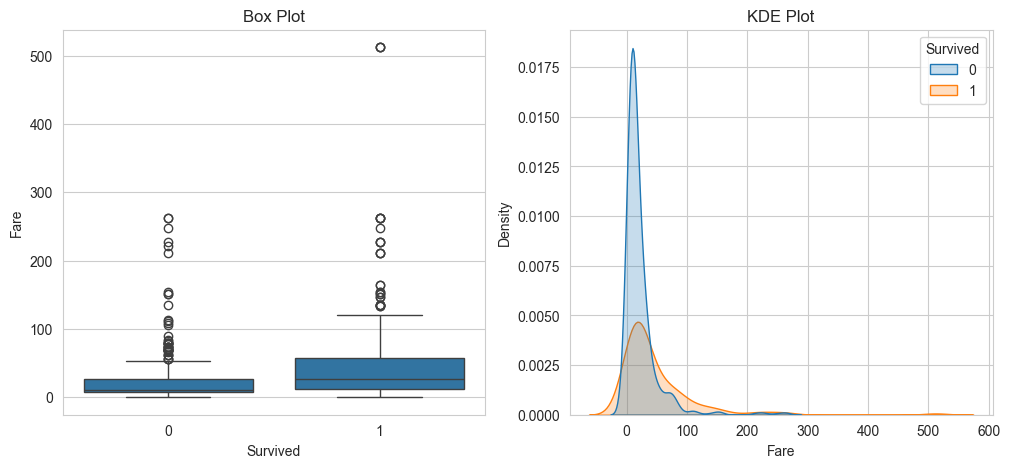

In [36]:
# Survived vs Fare

display(
  df.groupby('Survived')['Fare'].describe()
)

# Plot

fig, axes = plt.subplots(1,2, figsize = (12,5))

sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[0])
axes[0].set_title("Box Plot")

sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")
plt.show()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


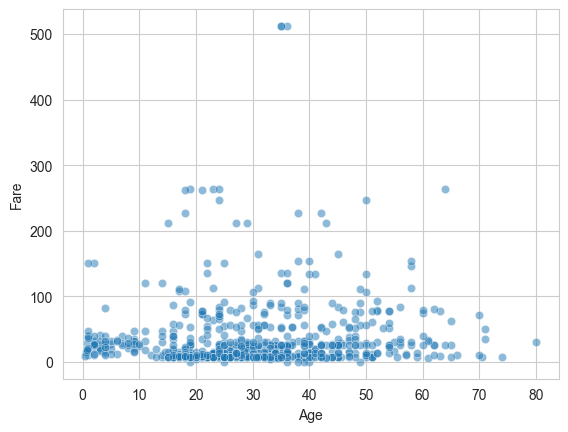

In [39]:
# Age vs Fare

display(df[['Age','Fare']].corr())

# Plot
sns.set_style('whitegrid')
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.5)

plt.show()

### Numerical vs Categorical
- Fare vs Pclass
- Age vs Sex

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


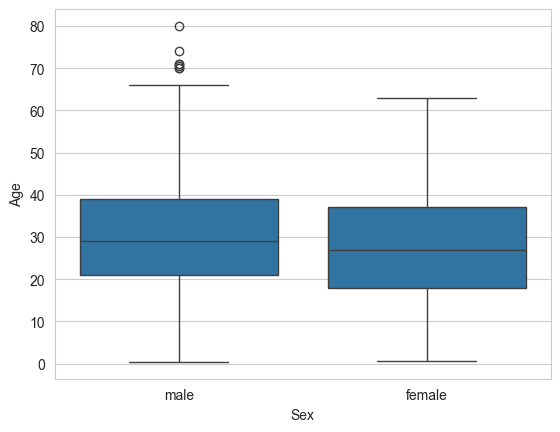

In [45]:
# Age vs Sex

display(
  df.groupby('Sex')['Age'].describe()
)

# Plot

sns.boxplot(x='Sex', y='Age', data=df)
plt.show()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


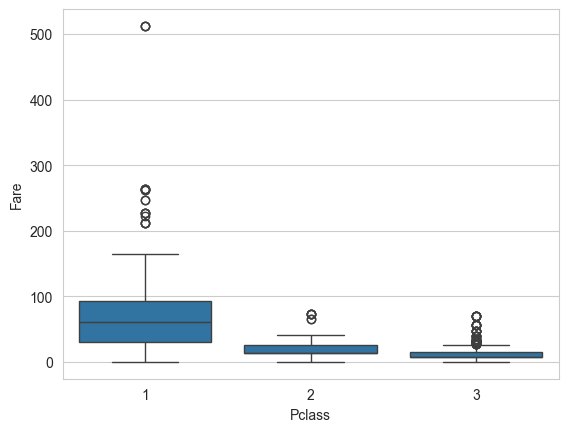

In [42]:
# Fare vs Pclass

display(
  df.groupby('Pclass')['Fare'].describe()
)


# Plot

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

### Categorical vs Categorical
- Sex vs Survived
- Embarked vs Survived

Survived,0,1
Sex,,
female,81,233
male,468,109


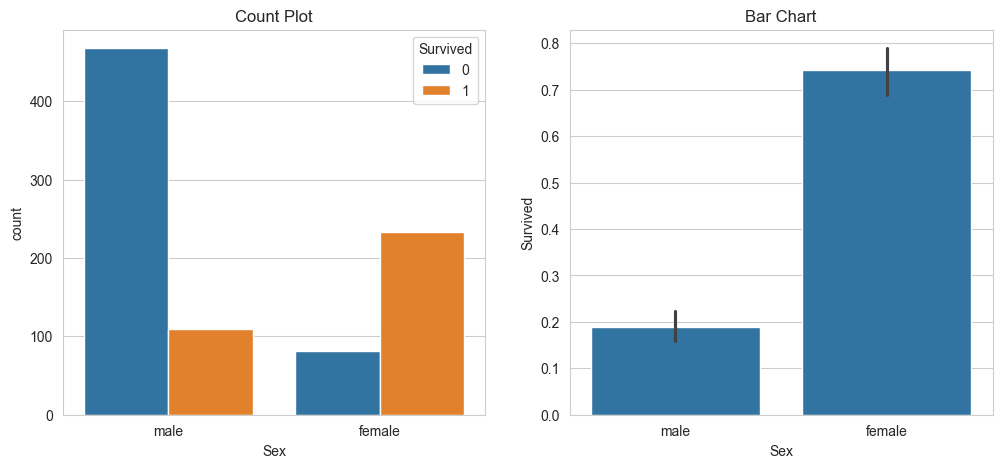

In [ ]:
# Sex vs Survived

display(
  pd.crosstab(df['Sex'], df['Survived'])
)

# Plot

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
axes[0].set_title("Count Plot")
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[1])
axes[1].set_title("Bar Chart")

plt.show()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


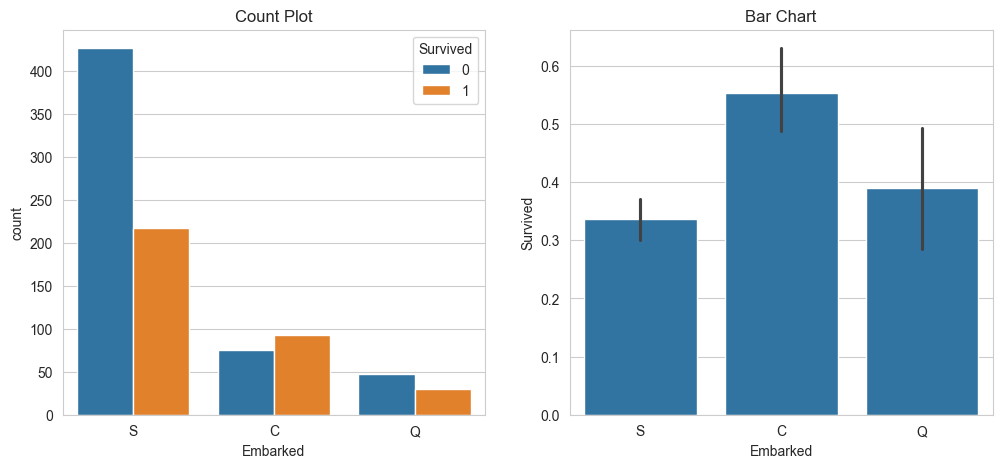

In [53]:
# Embarked vs Survived

display(
  pd.crosstab(df['Embarked'], df['Survived'])
)

# Plot

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[0])
axes[0].set_title("Count Plot")
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1])
axes[1].set_title("Bar Chart")

plt.show()